# Thin airfoil theory visualised

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from base_flows import vortex,uniform

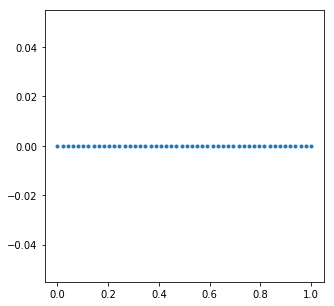

In [145]:
c=1
x_airfoil=np.linspace(0,1,50)
x_centers=(x_airfoil[1:] + x_airfoil[:-1]) / 2
plt.figure(figsize=(5,5))
plt.plot(x_airfoil,0*x_airfoil,marker='.',ls='')

In [146]:
def theta2x(theta):
    return 0.5*(1-np.cos(theta))
def x2theta(x):
    return np.arccos(1-2*x)

In [147]:
def An(n_lst,beta,alpha):
    A_lst=[]
    for n in n_lst:
        if n==0:
            A=alpha+beta
            A_lst.append(A)
        else:
            A=integrate.quad(lambda theta:-beta*np.cos(n*theta),x2theta(0.8),np.pi)
            A_lst.append(2/np.pi*A[0])
    return  np.array(A_lst)

In [162]:
alpha=np.deg2rad(0)
beta=np.deg2rad(15)
n=np.arange(100)
A=An(n,beta,alpha)


In [163]:
gamma=[]
Vinf=1
for xc in x_centers:
    theta=x2theta(xc)
    gamma.append(2*Vinf*(A[0]*(1+np.cos(theta))/np.sin(theta)+np.sum(A[1::]*np.sin(n[1::]*theta))))
gamma=np.array(gamma)

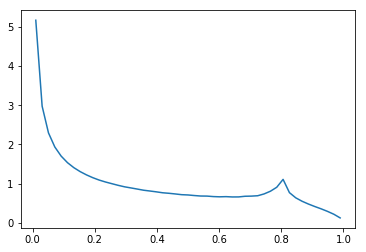

In [164]:
plt.plot(x_centers,gamma)

In [170]:
N = 50                                # number of points in each direction
x_start, x_end = -2.0, 2.0            # boundaries in the x-direction
y_start, y_end = -2.0, 2.0            # boundaries in the y-direction
x = np.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
y = np.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates
X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [171]:
u_vortex,v_vortex,psi_vortex=0,0,0
for i,xc in enumerate(x_centers):
    theta=x2theta(xc)
    strength=gamma[i]*np.diff(x)[i]
    u,v=vortex.get_velocity(strength,xc,0,X,Y)
    psi=vortex.get_stream_function(strength,xc,0,X,Y)
    u_vortex+=u
    v_vortex+=v
    psi_vortex+=psi

In [172]:
u_free,v_free=uniform.get_velocity(Vinf,X,Y)
psi_free=uniform.get_stream_function(Vinf,X,Y)

(-0.5, 1.5)

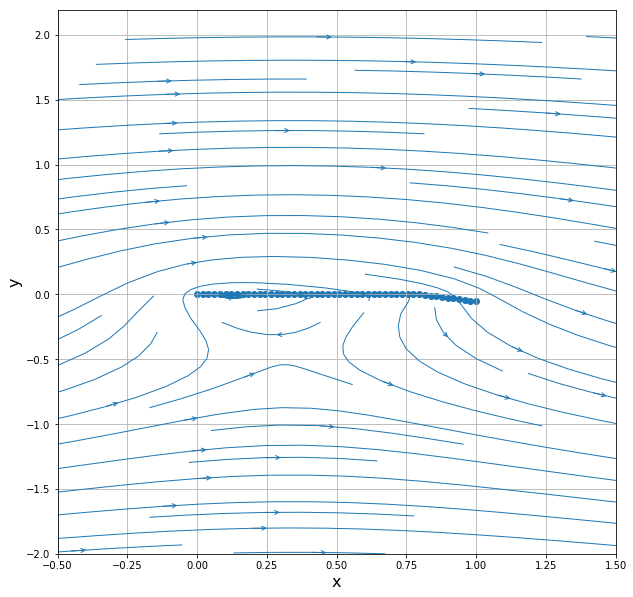

In [173]:
# superposition of the source on the freestream
u = u_free*np.cos(alpha)+ u_vortex
v = v_free*np.sin(alpha) + v_vortex
psi = psi_free + psi_vortex

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
z_airfoil=-np.tan(beta)*(x_airfoil-0.8)
z_airfoil[x_airfoil<0.8]=0
plt.scatter(x_airfoil,z_airfoil)
plt.xlim(-0.5,1.5)
# # calculate the stagnation point
# x_stagnation = x_source - strength_source / (2 * numpy.pi * u_inf)
# y_stagnation = y_source

# # display the stagnation point
# pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# # display the dividing streamline
# pyplot.contour(X, Y, psi, 
#                levels=[-strength_source / 2, strength_source / 2], 
#                colors='#CD2305', linewidths=2, linestyles='solid');

In [118]:
x

array([-2.        , -1.9798995 , -1.95979899, -1.93969849, -1.91959799,
       -1.89949749, -1.87939698, -1.85929648, -1.83919598, -1.81909548,
       -1.79899497, -1.77889447, -1.75879397, -1.73869347, -1.71859296,
       -1.69849246, -1.67839196, -1.65829146, -1.63819095, -1.61809045,
       -1.59798995, -1.57788945, -1.55778894, -1.53768844, -1.51758794,
       -1.49748744, -1.47738693, -1.45728643, -1.43718593, -1.41708543,
       -1.39698492, -1.37688442, -1.35678392, -1.33668342, -1.31658291,
       -1.29648241, -1.27638191, -1.25628141, -1.2361809 , -1.2160804 ,
       -1.1959799 , -1.1758794 , -1.15577889, -1.13567839, -1.11557789,
       -1.09547739, -1.07537688, -1.05527638, -1.03517588, -1.01507538,
       -0.99497487, -0.97487437, -0.95477387, -0.93467337, -0.91457286,
       -0.89447236, -0.87437186, -0.85427136, -0.83417085, -0.81407035,
       -0.79396985, -0.77386935, -0.75376884, -0.73366834, -0.71356784,
       -0.69346734, -0.67336683, -0.65326633, -0.63316583, -0.61